In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.seeingModel as seeingModel
import lsst.sims.skybrightness as skybrightness
from lsst.sims.utils import m5_flat_sed

In [2]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
filtercolors = {'u': 'c', 'g': 'g', 'r':'orange', 'i': 'y', 'z':'r', 'y': 'm'}

(90, 20)

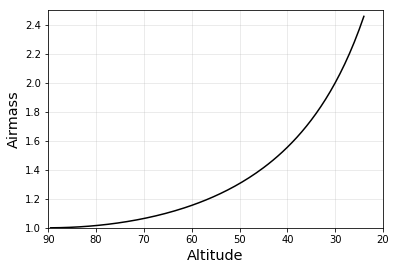

In [3]:
alts = np.arange(0, 90, 0.5)
azs = np.zeros(len(alts), float)
airmasses = 1./np.cos(np.pi/2. - np.radians(alts))
limits = np.where(airmasses < 2.5)
alts = alts[limits]
azs = azs[limits]
airmasses = airmasses[limits]

plt.plot(alts, airmasses, 'k-')
plt.xlabel('Altitude', fontsize='x-large')
plt.ylabel('Airmass', fontsize='x-large')
plt.grid(True, alpha=0.3)
plt.ylim(1, 2.5)
plt.xlim(90, 20)

(90, 20)

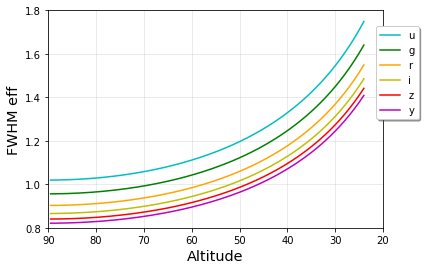

In [4]:
# How does the seeing change with airmass?
seeing = seeingModel.SeeingModel()
fwhm_500 = 0.7  # FWHM at zenith at 500nm 
fwhm_eff, fwhm_geom = seeing.seeing_at_airmass(fwhm_500, airmass=airmasses)

for i, f in enumerate(filterlist):
    plt.plot(alts, fwhm_eff[i], color=filtercolors[f], linestyle='-', label=f)
plt.legend(loc=[0.98, 0.5], fancybox=True, shadow=True)
plt.xlabel('Altitude', fontsize='x-large')
plt.ylabel('FWHM eff', fontsize='x-large')
plt.grid(True, alpha=0.3)
plt.ylim(0.8, 1.8)
plt.xlim(90, 20)

In [5]:
# How does the skybrightness change with airmass?
skybright = skybrightness.SkyModel(mags=True, airmass_limit=2.5)

(90, 20)

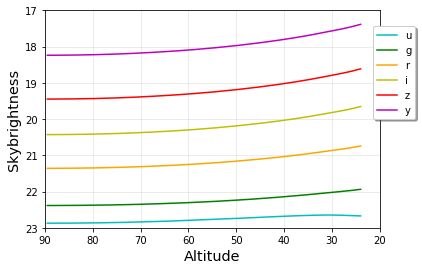

In [6]:
skybright.setParams(airmass=airmasses, azs=azs, alts=alts, moonPhase=0.0, moonAlt=-90, sunAlt=-90.0)
skymags = skybright.returnMags()

for i, f in enumerate(filterlist):
    plt.plot(alts, skymags[f], color=filtercolors[f], linestyle='-', label=f)
plt.legend(loc=[0.98, 0.5], fancybox=True, shadow=True)
plt.xlabel('Altitude', fontsize='x-large')
plt.ylabel('Skybrightness', fontsize='x-large')
plt.grid(True, alpha=0.3)
plt.ylim(23, 17)
plt.xlim(90, 20)

(90, 20)

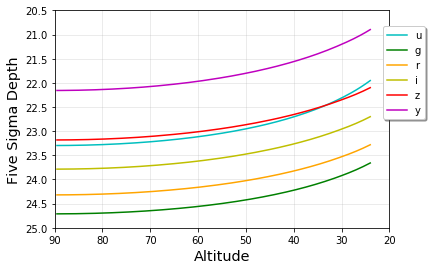

In [7]:
# Combination for m5 limits
m5_limits = {}
for i, f in enumerate(filterlist):
    m5_limits[f] = m5_flat_sed(f, skymags[f], fwhm_eff[i], expTime=30., airmass=airmasses)
    

for i, f in enumerate(filterlist):
    plt.plot(alts, m5_limits[f], color=filtercolors[f], linestyle='-', label=f)
plt.legend(loc=[0.98, 0.5], fancybox=True, shadow=True)
plt.xlabel('Altitude', fontsize='x-large')
plt.ylabel('Five Sigma Depth', fontsize='x-large')
plt.grid(True, alpha=0.3)
plt.ylim(25, 20.5)
plt.xlim(90, 20)